<a href="https://colab.research.google.com/github/Mritunjay1711/Thermal-Screening/blob/main/ThermalScreening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_image(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
!wget https://raw.githubusercontent.com/Mritunjay1711/Thermal-Screening/main/download.png

--2021-05-22 07:17:16--  https://raw.githubusercontent.com/Mritunjay1711/Thermal-Screening/main/download.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42934 (42K) [image/png]
Saving to: ‘download.png’

download.png        100%[===================>]  41.93K  --.-KB/s    in 0.007s  

2021-05-22 07:17:16 (6.18 MB/s) - ‘download.png’ saved [42934/42934]



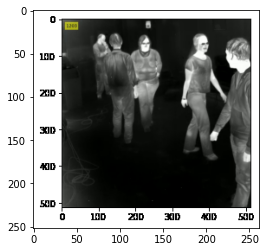

In [4]:
image = read_image("download.png")
plt.imshow(image)

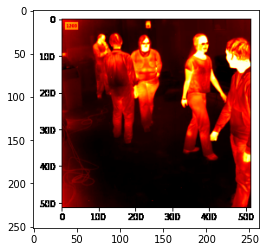

In [5]:
heatmap_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
heatmap = cv2.applyColorMap(heatmap_gray, cv2.COLORMAP_HOT)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

plt.imshow(heatmap)

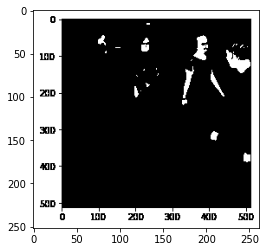

In [6]:
heatmap_gray = cv2.cvtColor(heatmap, cv2.COLOR_RGB2GRAY)
ret, binary_thresh = cv2.threshold(heatmap_gray, 200, 255, cv2.THRESH_BINARY)
plt.imshow(binary_thresh, cmap='gray')

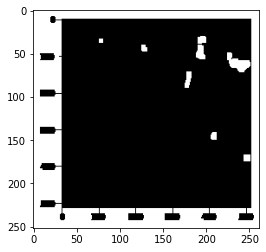

In [7]:
kernel = np.ones((5, 5), np.uint8)
image_erosion = cv2.erode(binary_thresh, kernel, iterations=1)
image_opening = cv2.dilate(image_erosion, kernel, iterations=1)

plt.imshow(image_opening, cmap='gray')

(242.30714285714285, 0.0, 0.0, 0.0)


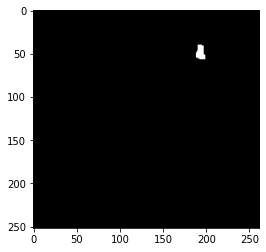

In [8]:
contours, _ = cv2.findContours(image_opening, 1, 2)

contour = contours[5]
mask = np.zeros_like(heatmap_gray)
x, y, w, h = cv2.boundingRect(contour)
mask[y:y+h, x:x+w] = image_opening[y:y+h, x:x+w]
print(cv2.mean(heatmap_gray, mask=mask))
plt.imshow(mask, cmap='gray')

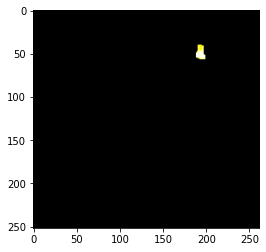

In [9]:
masked = cv2.bitwise_and(heatmap, heatmap, mask=mask)
plt.imshow(masked)

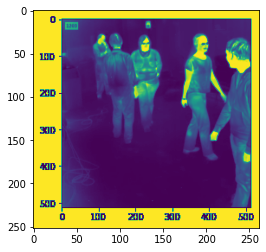

In [10]:
plt.imshow(heatmap_gray)

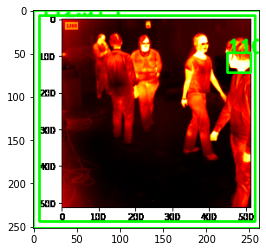

In [11]:
image_with_rectangles = np.copy(heatmap)

for contour in contours:
  
    x, y, w, h = cv2.boundingRect(contour)

    if w * h < 490:
      continue

    
    mask = np.zeros_like(heatmap_gray)
    mask[y:y+h, x:x+w] = image_opening[y:y+h, x:x+w]

    
    temp = round(cv2.mean(heatmap_gray, mask=mask)[0] / 2.25, 2)

    
    image_with_rectangles = cv2.rectangle(
        image_with_rectangles, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    
    cv2.putText(image_with_rectangles, f"{temp} F", (x, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)

plt.imshow(image_with_rectangles)